In [13]:
import pandas as pd 
cols = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class' ]
iris_df = pd.read_csv('/Users/yoanschnee/Coding/Portfolio/Iris/iris.csv', error_bad_lines=False, header=None)
iris_df.columns = cols

In [14]:
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# number of missing values
iris_df.isnull().any(axis=1).sum()

0

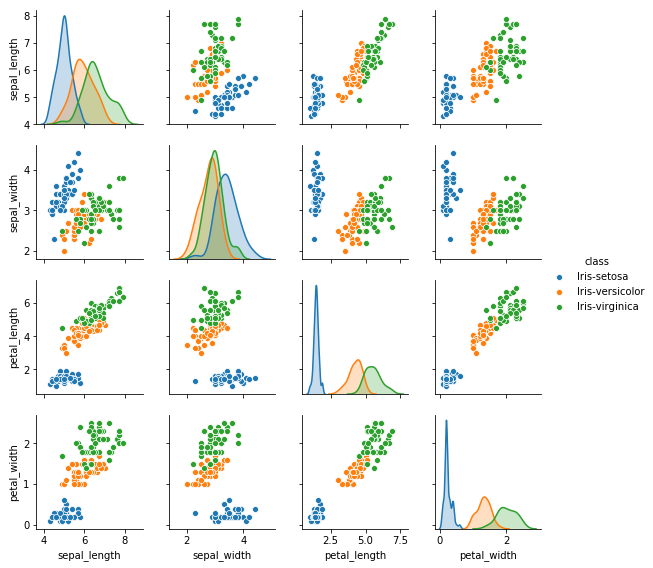

In [19]:
# plot pairplot of all variables
import seaborn as sns
sns.pairplot(iris_df, hue='class', height=2);

In [58]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

feature_cols = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_train, X_test, y_train, y_test = train_test_split(iris_df[feature_cols], iris_df['class'], test_size=0.2, random_state=1)

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_predict_gnb = model.predict(X_test)
pred_error = [('Naive Bayes Classifier', round(sum(y_predict_gnb != y_test)/len(y_test) *100, 2))]

print('Prediction error for the Naive Bayes Classifier : ', pred_error[-1][1], '%')

Prediction error for the Naive Bayes Classifier :  3.33 %


In [59]:
# knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
y_predict_knn = model.predict(X_test)

pred_error.append(('knn', round(sum(y_predict_knn != y_test)/len(y_test) *100, 2)))

print('Prediction error k-nearest neighbours classifier : ', pred_error[-1][1], '%')

Prediction error k-nearest neighbours classifier :  0.0 %


In [60]:
# Verification
print('Prediction success: ', round(sum(y_predict_knn == y_test)/len(y_test) *100, 2), '%')

Prediction success:  100.0 %


In [61]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
y_predict_lda = model.predict(X_test)

pred_error.append(('LDA', round(sum(y_predict_lda != y_test)/len(y_test) *100, 2)))
print('Prediction error for LDA : ', pred_error[-1][1], '%')

Prediction error for LDA :  0.0 %


In [62]:
# SVMs
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

for model, title in zip(models, titles):
    y_predict_clf = model.predict(X_test)
    pred_error.append((title, round(sum(y_predict_clf != y_test)/len(y_test) *100, 2)))
    print(f'Prediction error for {title} model : ', pred_error[-1][1], '%')

Prediction error for SVC with linear kernel model :  0.0 %
Prediction error for LinearSVC (linear kernel) model :  10.0 %
Prediction error for SVC with RBF kernel model :  3.33 %
Prediction error for SVC with polynomial (degree 3) kernel model :  0.0 %


In [63]:
pred_error

[('Naive Bayes Classifier', 3.33),
 ('knn', 0.0),
 ('LDA', 0.0),
 ('SVC with linear kernel', 0.0),
 ('LinearSVC (linear kernel)', 10.0),
 ('SVC with RBF kernel', 3.33),
 ('SVC with polynomial (degree 3) kernel', 0.0)]

In [79]:
# Diplay results in ranking
display(pd.DataFrame(pred_error, columns=['Model', 'Test Error (%)']).sort_values(by=['Test Error (%)']))

,Model,Test Error (%)
1,knn,0.00
2,LDA,0.00
3,SVC with linear kernel,0.00
6,SVC with polynomial (degree 3) kernel,0.00
0,Naive Bayes Classifier,3.33
5,SVC with RBF kernel,3.33
4,LinearSVC (linear kernel),10.00
